In [1]:
import gymnasium as gym
from tqdm import tqdm
import time
import matplotlib.pyplot as plt
import numpy as np

#### Open-loop Control

stay alive for 0.5457229614257812 seconds


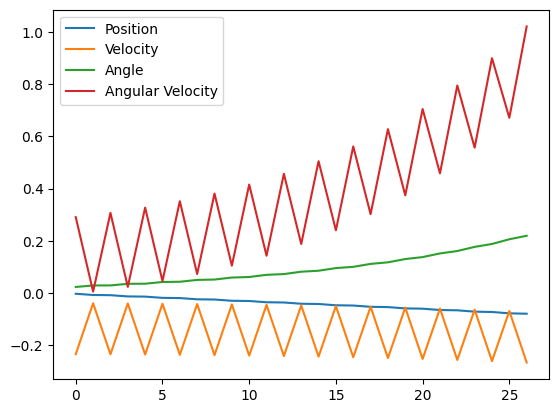

In [2]:
env_view = gym.make("CartPole-v1", render_mode="human") 
env_view.reset()
donee = False
ts = time.time()
i = 0
data = []
while not donee:
    next_state, _, donee, _, _ = env_view.step(i%2)
    data.append(next_state)
    i += 1
te = time.time()
print(f'stay alive for {te-ts} seconds')
env_view.close()

observation_space = ['Position', 'Velocity', 'Angle', 'Angular Velocity']
data = np.array(data)
for i in range(4):
    plt.plot(data[:, i:i+1], label=observation_space[i])
plt.legend()
plt.show()

#### All the way to left

/home/richa/anaconda3/envs/rl-lab/lib/python3.8/site-packages/gymnasium/envs/classic_control/cartpole.py:214: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


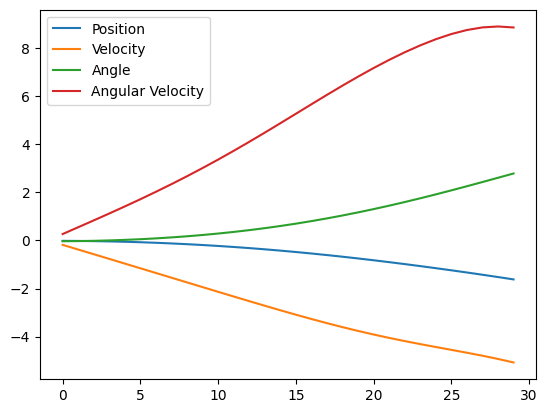

In [3]:
env_view = gym.make("CartPole-v1", render_mode="human") 
env_view.reset()
done = False
i = 0
data = []
for _ in range(30):
    next_state, _, done, _, _ = env_view.step(0)
    data.append(next_state)
env_view.close()

observation_space = ['Position', 'Velocity', 'Angle', 'Angular Velocity']
data = np.array(data)
for i in range(4):
    plt.plot(data[:, i:i+1], label=observation_space[i])
plt.legend()
plt.show()

#### Closed-loop Control

In [4]:
env_view = gym.make("CartPole-v1", render_mode="human") 
env_view.reset()
done = False
count = 0

lin_vel_err_thr = 0.3   # m/s
ang_err_thr = 0.1       # rad

env_data = []
act_data = []

def loco_ctl(ang, ang_vel):
    if ang > 0 and ang_vel > 0:
        action = 1
    elif ang > 0 and ang_vel < 0:
        action = 0
    elif ang < 0 and ang_vel > 0:
        action = 1
    elif ang < 0 and ang_vel < 0:
        action = 0
    return action

while not done:
    if count == 0:
        action = np.random.randint(0, 2)
    next_state, _, done, _, _ = env_view.step(action)
    lin = next_state[0]
    lin_vel = next_state[1]
    ang = next_state[2]
    ang_vel = next_state[3]

    lin_vel_err = np.abs(0 - lin_vel)
    ang_err = np.abs(0 - ang)

    if lin_vel_err > lin_vel_err_thr:
        if ang_err > ang_err_thr:
            action = int((-ang_err / (0 - ang) + 1) / 2)
        action = int((lin_vel_err / (0 - lin_vel) + 1) / 2)
    else:
        action = loco_ctl(ang, ang_vel)

    act_data.append(action)
    env_data.append(next_state)
    count += 1
env_view.close()

In [18]:
env_view = gym.make("CartPole-v1", render_mode="human") 
env_view.reset()
done = False
count = 0

lin_vel_err_thr = 0.3   # m/s
ang_err_thr = 0.1       # rad

env_data = []
act_data = []

def yen_ctrl_law(state):
    err = 0 - state
    action = np.dot(np.array([0.1, 0.5, 0.4, 0.5]), err)
    return 0 if action > 0 else 1

while not done:
    if count == 0:
        action = np.random.randint(0, 2)
    next_state, _, done, _, _ = env_view.step(action)

    action = yen_ctrl_law(next_state)

    act_data.append(action)
    env_data.append(next_state)
    count += 1
env_view.close()

KeyboardInterrupt: 

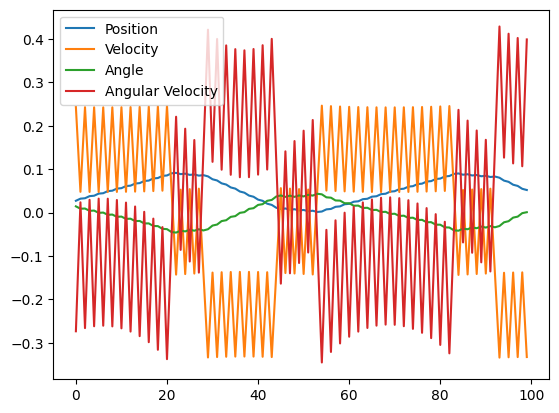

In [21]:

observation_space = ['Position', 'Velocity', 'Angle', 'Angular Velocity']
action_space = ['Left', 'Right']
act_data = np.array(act_data)
env_data = np.array(env_data[:100])
for i in range(4):
    plt.plot(env_data[:, i:i+1], label=observation_space[i])
# plt.axhline(lin_vel_err_thr, color='blue', linestyle='--')
# plt.axhline(-lin_vel_err_thr, color='blue', linestyle='--')
plt.legend()
plt.show()

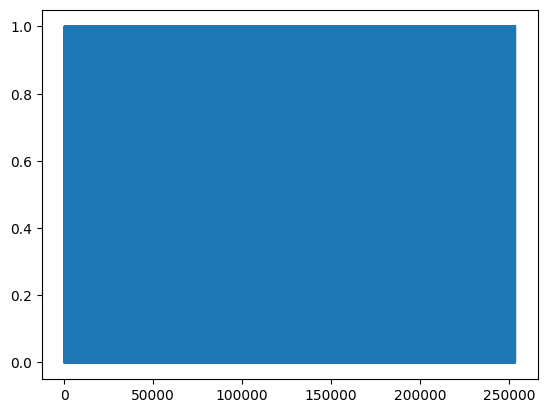

In [22]:
plt.plot(np.arange(len(act_data)), act_data)
plt.show()